# CAP 6618 - Machine Learning for Computer Vision

Christian Garbin - final notebook for programming project 2

**IMPORTANT**: This notebook uses Python 3.

# Step 1: Load and split MNIST dataset

Load MNIST dataset in a sklearn-friendly format (from A. Géron's book).

In [3]:
# From Geron 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np

# Standard library
import random

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    # No need to save pics
    pass

In [4]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

Split the dataset into training and test data and shuffle the training data to help classifiers that can get stuck a local minimum.

**IMPORTANT**: In the code below we are using the first 50,000 elements as the train set to match Nielsen's code. If we train with all 60,000 elements we would be giving this classifier an unfair edge over Nielsen's classifiers tested above.

Before we slice the 50,000 elements we need to shuffle the complete train set we get from MNIST. Otherwise we will not be sure we are getting the correct distribution for all digits (shuffling doesn't guarantee that either - we will check with a histogram below).

The test data is still the last 10,000 elements, as defined in the MNIST dataset. We currently don't use the elements in the [50,001-60,000] range. They would be used as a validation set.


In [5]:
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffle the complete train set
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Now extract the first 50,000
X_train, y_train = X_train[:50000], y_train[:50000]

Check that we have a good distribution for all digits.

What we are looking for: about the same distribution of digits in the train and test set.

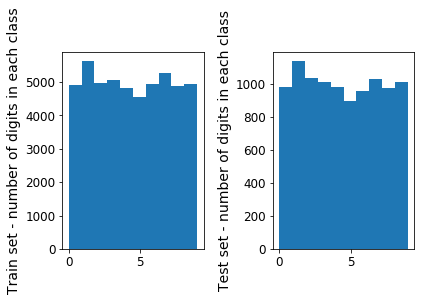

In [6]:
plt.subplot(121); plt.hist(y_train); plt.ylabel('Train set - number of digits in each class')
plt.subplot(122); plt.hist(y_test); plt.ylabel('Test set - number of digits in each class')
plt.tight_layout()
plt.show()

## Step 2: Baseline network

The "modernized" network from the experimental notebook was chosen as the final network for the report.

Although other networks came close to that performance, training the "modernized" network was significantly faster, making it more suitable for experiments.

In [7]:
%%time

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver="adam", alpha=0.0001, batch_size=100, max_iter=30, verbose=True)
fit_results = clf.fit(X_train, y_train)

print(fit_results)  # must explicitly print because of %%time

Iteration 1, loss = 2.15026206
Iteration 2, loss = 0.54347406
Iteration 3, loss = 0.34343126
Iteration 4, loss = 0.26920867
Iteration 5, loss = 0.21415897
Iteration 6, loss = 0.19735168
Iteration 7, loss = 0.18687150
Iteration 8, loss = 0.16971959
Iteration 9, loss = 0.16215490
Iteration 10, loss = 0.15236274
Iteration 11, loss = 0.14958248
Iteration 12, loss = 0.14331481
Iteration 13, loss = 0.13956892
Iteration 14, loss = 0.12719040
Iteration 15, loss = 0.12648395
Iteration 16, loss = 0.11887030
Iteration 17, loss = 0.11865468
Iteration 18, loss = 0.10682829
Iteration 19, loss = 0.11048063
Iteration 20, loss = 0.10100963
Iteration 21, loss = 0.10041054
Iteration 22, loss = 0.10317232
Iteration 23, loss = 0.08800154
Iteration 24, loss = 0.09657224
Iteration 25, loss = 0.09188068
Iteration 26, loss = 0.08717511
Iteration 27, loss = 0.07711210
Iteration 28, loss = 0.08913072
Iteration 29, loss = 0.08560365
Iteration 30, loss = 0.07780723
MLPClassifier(activation='relu', alpha=0.0001, ba

/Users/cgarbin/fau/cap6618/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
#Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9543